In [1]:
%load_ext autoreload
%autoreload 2

## Objetivo

In [2]:
from diffractio import um, mm, nm, np, sp, plt, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.utils_drawing import draw_several_fields

number of processors: 8
total memory        : 7.5 Gb
available memory    : 42 %
max frequency       : 4000 GHz


In [3]:
num_x=128
num_y=128
DOE_size=100*um

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

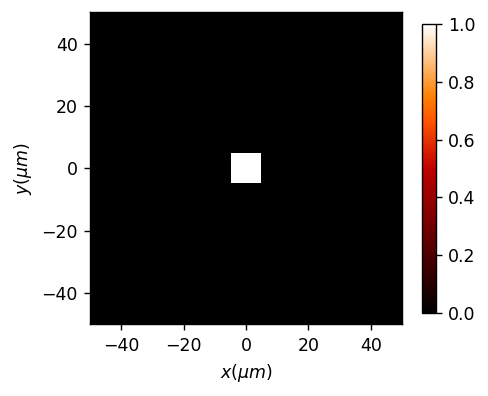

In [4]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(0,0), size=(10,10), angle=0)
target.draw(has_colorbar='vertical');

## FFT matemática

In [5]:
fft_target = np.fft.fft2(np.abs(target.u))
target_2 = np.fft.ifft2(fft_target)

In [6]:
I_target_2 = np.abs(target_2)**2

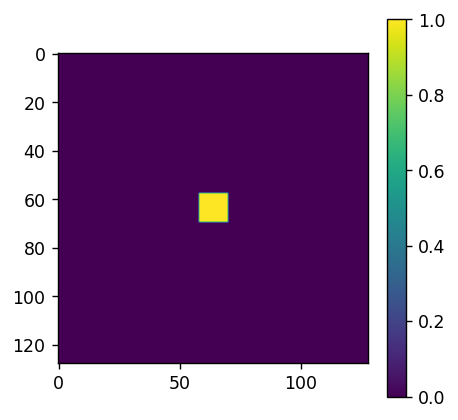

In [7]:
plt.imshow(I_target_2)
plt.colorbar()

## FFT Óptica

In [8]:
u_fft_target = target.fft(z=1, shift=False, new_field=True)

In [9]:
print( u_fft_target)

Scalar_field_XY
 - x:  (128,),   y:  (128,),   u:  (128, 128)
 - xmin:       -0.64 um,  xmax:      0.64 um
 - ymin:       -0.64 um,  ymax:      0.64 um
 - Imin:       0.00,     Imax:      20147.36
 - phase_min:  -178.59 deg, phase_max: 178.59 deg
 - wavelength: 0.63 um
 - date:       2021-11-22_15_14_27
 - info:       



((<matplotlib.image.AxesImage at 0x7fea1b669250>,
  <matplotlib.image.AxesImage at 0x7fea1b64aa00>),
 None,
 None)

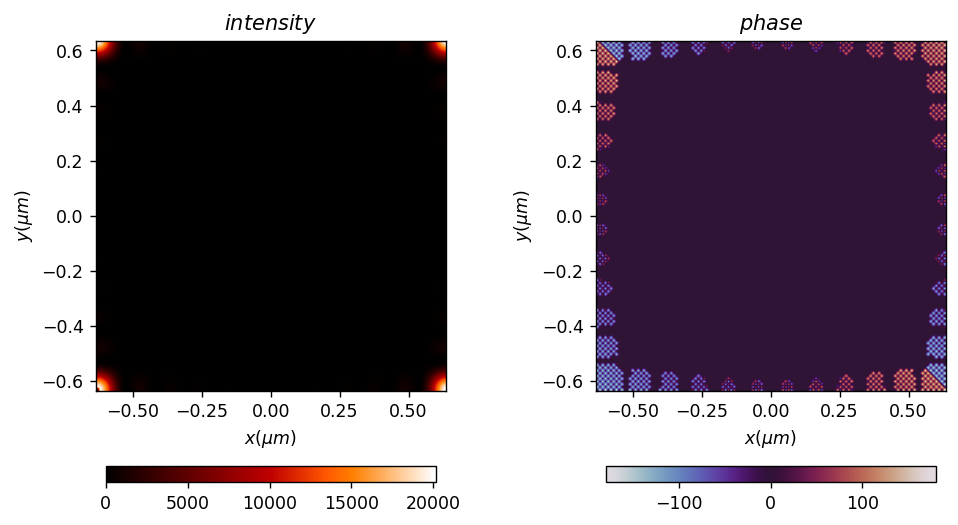

In [10]:
u_fft_target.draw('field')

In [11]:
u_target_2 = u_fft_target.ifft(z=1, shift=False, new_field=True)

((<matplotlib.image.AxesImage at 0x7fea1b33ea90>,
  <matplotlib.image.AxesImage at 0x7fea1b55f280>),
 None,
 None)

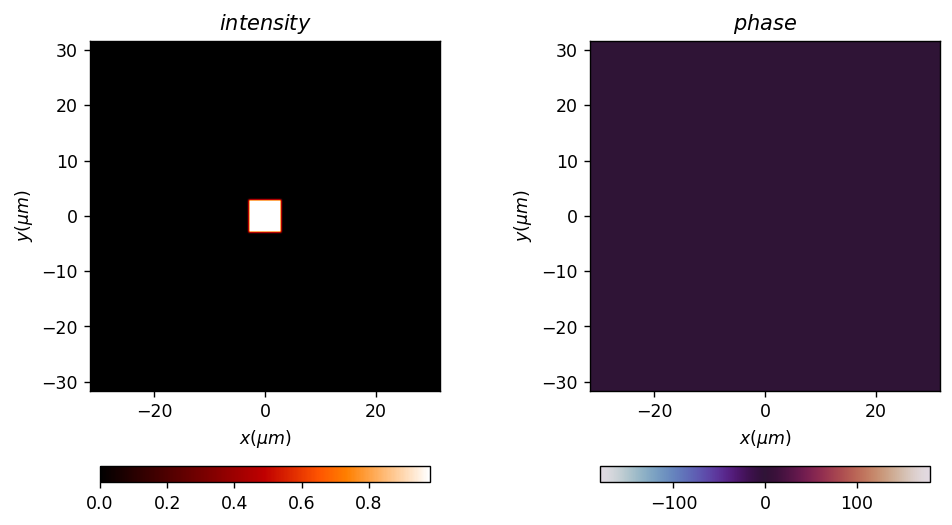

In [12]:
u_target_2.draw('field')

In [13]:
I_target_2_opt = u_target_2.intensity()

In [14]:
print(u_target_2)

Scalar_field_XY
 - x:  (128,),   y:  (128,),   u:  (128, 128)
 - xmin:       -31.64 um,  xmax:      31.64 um
 - ymin:       -31.64 um,  ymax:      31.64 um
 - Imin:       0.00,     Imax:      0.98
 - phase_min:  -180.00 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2021-11-22_15_14_28
 - info:       

